In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# creating engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine,reflect=True)

In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Saving references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Creating our session from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [16]:
# The most recent date in the data set.
lastDate = session.query(func.max(Measurement.date)).first()[0]
lastDate

'2017-08-23'

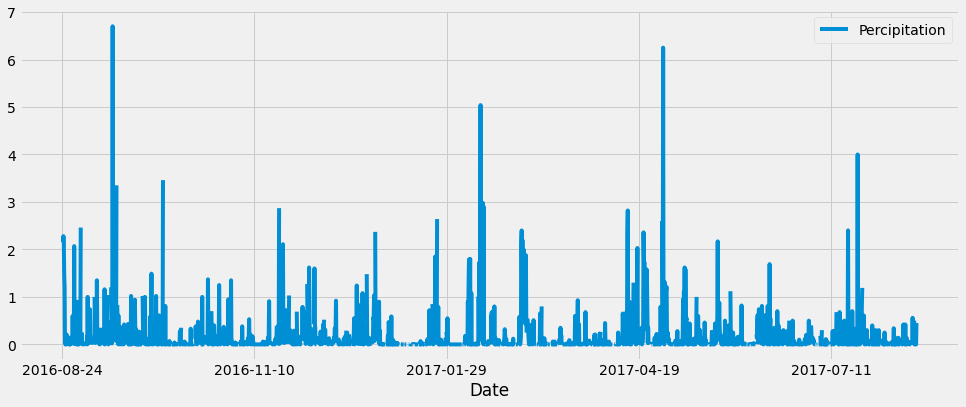

In [31]:
# Ploted the last 12 months of precipitation data 
# Starting from the most recent data point in the database. 
lastDate

# Calculating the date one year from the last date in data set.
prevYear = dt.datetime.strptime(lastDate,'%Y-%m-%d') - dt.timedelta(365)

# A query to retrieve the date and precipitation scores
results = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date >= prevYear).all()

# Saving the query results as a Pandas DataFrame and set the index to the date column
date_df = pd.DataFrame(results, columns=['Date', 'Percipitation']).set_index('Date')

# Sorting the dataframe by date
sorted_date_df= date_df.sort_index()

# Using Pandas Plotting with Matplotlib to plot the data
sorted_date_df.plot(figsize = (15,6) )
plt.show()


In [33]:
# Using Pandas to calcualte the summary statistics for the precipitation data
date_df.describe()

,Percipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [35]:
# A query to calculate the total number stations in the dataset
session.query(Station).count()

9

In [47]:
# Finding the most active stations (i.e. what stations have the most rows?)
# List of the stations and the counts in descending order.
mas = session.query(Measurement.station,func.count()).group_by(Measurement.station).order_by(func.count().desc()).all()
mas

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [59]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temps = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).first()
f'Lowest: {temps[0]}, Highest: {temps[1]}, Mean: {temps[2]:.2f}'

'Lowest: 53.0, Highest: 87.0, Mean: 73.10'

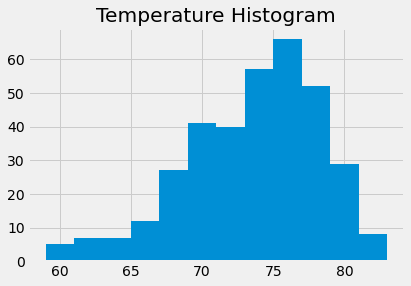

In [72]:
# Using the most active station id
# Querying the last 12 months of temperature observation data for this station and plotting the results as a histogram
res = session.query(Measurement.tobs).filter((Measurement.date>=prevYear)&(Measurement.station==mas[0][0])).all()

pd.DataFrame(res).hist(bins=12)
plt.title('Temperature Histogram')
plt.show()

# Close session

In [73]:
# Close Session
session.close()